To start IPython local engines, open a terminal in Jupyter lab and run ```ipcluster start -n 4```

In [1]:
#import hpc05
#client = hpc05.Client(profile='pbs', timeout=60)
#print("Connected to hpc05")

from ipyparallel import Client
client = Client()
print("Connected to local engines")

Connected to local engines


In [2]:
client.ids

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [3]:
dview = client[:]
dview.use_dill()
lview = client.load_balanced_view()
print('Connected to {} engines.'.format(len(dview)))

got unknown result: e22547de-6fb32d155fda6c2cb27b6b19_9
Connected to 24 engines.


In [4]:
# set the working directory of clusters to the same folder as this notebook. 
import os
wd='"'+os.getcwd()+'"'
%px import sys, os; os.chdir($wd); os.getcwd()# %px is a magic command for parallel clusters

Out[0:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[1:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[2:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[3:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[4:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[5:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[6:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[7:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[8:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[9:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[10:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[11:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[12:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[13:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[14:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[15:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[16:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[17:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[18:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[19:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[20:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[21:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[22:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

Out[23:3]: '/home/frolovlab/Desktop/QPCsupercurrent'

In [5]:
# Related third party imports
import holoviews as hv
import kwant
import numpy as np
import pandas as pd

# Local imports
import funcs

%matplotlib inline
hv.notebook_extension()

# Creating some wires as example

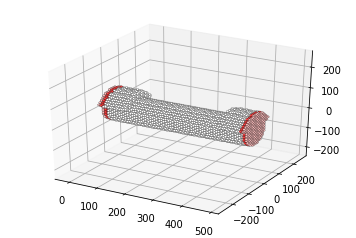

In [6]:
# Create system with infinite leads
syst_pars = dict(a=8, angle=0, site_disorder=False, holes=True, L=320, L_sc=80,
                 phi=135, r1=60, r2=90, shape='circle', with_leads=True,
                 with_shell=True, with_vlead=True)

syst, hopping = funcs.make_3d_wire(**syst_pars)
kwant.plot(syst);

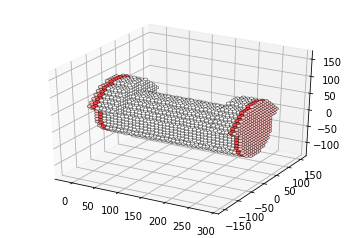

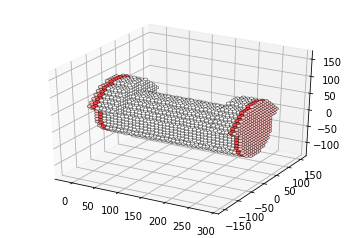

In [7]:
# Create system without leads and bigger SC regions
syst_pars['L_sc'] = 40
syst_pars['L'] = 200
syst, hopping = funcs.make_3d_wire(**syst_pars)
kwant.plot(syst)#, site_size=0, hop_lw=0.1);

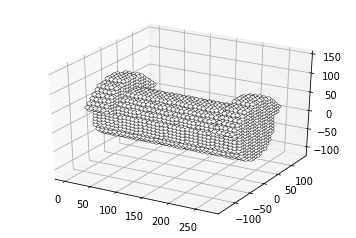

In [8]:
# Create system without leads
syst_pars['with_leads'] = False
syst, hopping = funcs.make_3d_wire(**syst_pars)
kwant.plot(syst);

# Mean free path calculation
See [mean-free-path.ipynb](mean-free-path.ipynb) for the data processing.

## Reduce all vals (Ls, salts, ...) to lenth 1 vectors to save time...

In [6]:
syst_pars = dict(a=8, angle=0, site_disorder=True, holes=False, L_sc=8,
                 phi=135, r1=60, r2=90, shape='circle', with_leads=True,
                 with_shell=False, with_vlead=False)

params = dict(alpha=20, B_x=0, B_y=0, B_z=0, Delta=0, g=50,
              orbital=True, V='lambda x: 0', **funcs.constants.__dict__)

Ls = [80]
salts = [0]
disorders = [0,10]
mus = [10]

vals = funcs.named_product(salt=salts, disorder=disorders, L=Ls, mu=mus)
print(len(vals))

def func(val, syst_pars=syst_pars, params=params):
    import kwant, funcs
    
    # Combine the fixed parameters `params` and the changing
    # parameters `val` to one dict and evaluate the string
    # lambda functions.
    params = funcs.parse_params(dict(**params, **val))
    
    # Remove the parameters from `params` that belong in `syst_pars`.
    for x in ['L']:
        syst_pars[x] = params.pop(x)

    syst, hopping = funcs.make_3d_wire(**syst_pars)
    smatrix = kwant.smatrix(syst, params=params)
    
    # Return a combined dictionary with the results and input.
    return dict(transmission=smatrix.transmission(0, 1),
                num_propagating=smatrix.num_propagating(0),
                **val)


2


In [7]:
# using ralative path (path starts with "./")
fname = './tmp/I_c(B_x)_mu0_20meV_disorder0,75meV_T0.05K_orbital_SOI_Zeeman.hdf'

In [8]:
funcs.run_simulation(lview,func, vals, dict(**params, **syst_pars), fname, overwrite=True)

   2/2 tasks finished after    5 s
done
Saved ./tmp/I_c(B_x)_mu0_20meV_disorder0,75meV_T0.05K_orbital_SOI_Zeeman.hdf, 0 more files to go, 0:00:00 time left before everything is done.


In [9]:
df = pd.read_hdf(fname)

In [10]:
df

,L,disorder,mu,num_propagating,salt,transmission,B_x,B_y,B_z,Delta,...,orbital,phi,r1,r2,shape,site_disorder,t,with_leads,with_shell,with_vlead
0,80,0,10,6,0,6.00000,0,0,0,0,...,True,135,60,90,circle,True,2539.988053,True,False,False
1,80,10,10,6,0,5.88072,0,0,0,0,...,True,135,60,90,circle,True,2539.988053,True,False,False


In [11]:
df.columns

Index(['L', 'disorder', 'mu', 'num_propagating', 'salt', 'transmission', 'B_x',
       'B_y', 'B_z', 'Delta', 'L_sc', 'V', 'a', 'alpha', 'angle', 'c',
       'current_unit', 'e', 'eV', 'g', 'hbar', 'holes', 'k', 'm_e', 'm_eff',
       'meV', 'mu_B', 'orbital', 'phi', 'r1', 'r2', 'shape', 'site_disorder',
       't', 'with_leads', 'with_shell', 'with_vlead'],
      dtype='object')

# $B_x(I_c)$ combinations of effects and geometries:

In [18]:
syst_pars = dict(a=8, angle=0, site_disorder=False, holes=True, phi=135,
                 r1=60, r2=70, shape='circle', with_shell=True, with_vlead=True)

params = dict(B_y=0, B_z=0, Delta=60, c_tunnel=5/8, V=lambda x: 0, **funcs.constants.__dict__)

Ts = [0.1, 0.5, 1]
orbital_bools = [False, True]
gs = [0, 50]
alphas = [0, 20]
mus = [10, 15, 20, 25, 30]
Ls = [80, 160, 320, 640]
leads = [(True, 8), (False, 400)]
Bs = np.linspace(0, 2, 101)

vals = funcs.named_product(T=Ts, L=Ls, orbital=orbital_bools,
                           g=gs, alpha=alphas, mu=mus, leads=leads, B_x=Bs)

def func(val, syst_pars=syst_pars, params=params):
    import funcs
    val['with_leads'], val['L_sc'] = val['leads']

    # Combine the fixed parameters `params` and the changing
    # parameters `val` to one dict and evaluate the string
    # lambda functions.
    params = funcs.parse_params(dict(**params, **val))

    # Remove the parameters from `params` that belong in `syst_pars`.
    for x in ['with_leads', 'L_sc', 'L']:
        syst_pars[x] = params.pop(x)

    syst, hopping = funcs.make_3d_wire(**syst_pars)

    # Return a combined dictionary with the results and input.
    return dict(**funcs.I_c(syst, hopping, params), **val)

fname = "tmp/I_c(B_x)_no_disorder_combinations_of_effects_and_geometries_{}.hdf"
funcs.run_simulation(lview, func, vals, dict(**params, **syst_pars), fname, 2000)


NameError: name 'lview' is not defined

# $B_x(I_c)$ with disorder:
* Main paper figure 4
* Supplementary materials figure 8

In [13]:
ONLY_PAPER_COMBINATIONS = False

syst_pars = dict(a=8, angle=0, site_disorder=True, holes=True, L=160,
                 L_sc=80, phi=135, r1=60, r2=75, shape='circle',
                 with_leads=True, with_shell=True, with_vlead=True)

params = dict(B_x=0, B_z=0, Delta=60, c_tunnel=5/8, V='lambda x: 0', T=50e-3, **funcs.constants.__dict__)

Bs = np.linspace(-0.1, 0.1, 2)
#Bs = [0]

if ONLY_PAPER_COMBINATIONS:
    # These are all the combinations of effects that are showed in Fig. 4 of the main paper.
    vals = [[(0, 0, True, 50, 20, 10, B),
             (0, 0, False, 50, 20, 10, B),
             (0, 0, True, 50, 0, 10, B),
             (0, 0, False, 50, 0, 10, B),
             (0, 0, True, 50, 20, 20, B),
             (0, 0, False, 50, 20, 20, B),
             (0, 0, True, 50, 0, 20, B),
             (0, 0, False, 50, 0, 20, B),
             (7, 75, True, 50, 20, 20, B)]
            for B in Bs]
    vals = sum(vals, [])
    names = ['salt', 'disorder', 'orbital', 'g', 'alphas', 'mu', 'B_x']
    vals = [dict(zip(names, val)) for val in vals]

else:
    # Calculate all combinations of effects (which is much slower.)
#    vals = funcs.named_product(salt=np.arange(0, 8, 1), disorder=[0, 75], 
#                               orbital=[False, True], g=[0, 50], alpha=[0, 20],
#                               mu=[10, 20], B_x=Bs)

    vals = funcs.named_product(salt=[0], disorder=[0], 
                               orbital=[True], g=[50], alpha=[0],#, 20],
                               mu=[10], B_y=Bs)
    # Filter out different salts when there is no disorder.
    vals = [val for val in vals if not (val['salt'] > 0 and val['disorder'] == 0)]

print(len(vals))

def func(val, syst_pars=syst_pars, params=params):
    import funcs
    syst, hopping = funcs.make_3d_wire(**syst_pars)
    
    # Combine the fixed parameters `params` and the changing
    # parameters `val` to one dict and evaluate the string
    # lambda functions.
    params = funcs.parse_params(dict(**params, **val))
    
    # Return a combined dictionary with the results and input.
    return dict(**funcs.I_c(syst, hopping, params), **val)

2


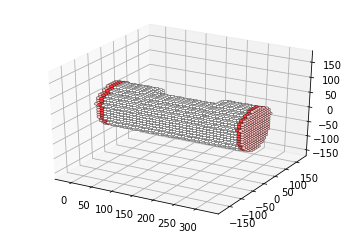

In [14]:
syst, hopping = funcs.make_3d_wire(**syst_pars)
kwant.plot(syst);

In [ ]:
fname_i = "tmp/I_c(B_x)_mu_10,20meV_disorder0meV_T0.05K_orbital_SOI_ZeemanY.hdf"
funcs.run_simulation(lview, func, vals, dict(**params, **syst_pars), fname_i, 100)

   0/2 tasks finished after  291 s

ModuleNotFoundError: No module named 'git'

# Rotation of the magnetic field in the $xy$-plane
* Supplementary materials figure 10

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4f/3D_Spherical.svg/200px-3D_Spherical.svg.png)

In [20]:
syst_pars = dict(a=8, angle=0, site_disorder=True, holes=True, L=160, L_sc=8,
                 phi=135, r1=50, r2=70, shape='circle',
                 with_leads=True, with_shell=True, with_vlead=True)

params = dict(alpha=20, B_z=0, Delta=60, g=50, mu=20, salt=7,
              orbital=True, c_tunnel=5/8, V='lambda x: 0', T=100e-3, **funcs.constants.__dict__)

Bs = np.linspace(0, 2, 101)
thetas = [0, 45, 90]
vals = funcs.named_product(B=Bs, theta=thetas, disorder=[0, 75])

def func(val, syst_pars=syst_pars, params=params):
    import funcs
    import numpy as np
    angle = np.deg2rad(val['theta'])
    val['B_x'] = val['B'] * np.cos(angle).round(15)
    val['B_y'] = val['B'] * np.sin(angle).round(15)
    
    # Combine the fixed parameters `params` and the changing
    # parameters `val` to one dict and evaluate the string
    # lambda functions.
    params = funcs.parse_params(dict(**params, **val))

    syst, hopping = funcs.make_3d_wire(**syst_pars)

    # Return a combined dictionary with the results and input.
    return dict(**funcs.I_c(syst, hopping, params), **val)

fname = 'data/I_c(B_x)_mu20meV_rotation_of_field_in_xy_plane.hdf'
funcs.run_simulation(lview, func, vals, dict(**syst_pars, **params), fname, None, overwrite=True)

NameError: name 'lview' is not defined

# Tuning the induced gap

In [21]:
syst_pars = dict(a=8, angle=0, site_disorder=False, holes=True,
                 L=80, L_sc=8, phi=135, r1=50, r2=70, shape='circle',
                 with_leads=True, with_shell=True, with_vlead=False)

params = dict(alpha=20, B_x=0, B_y=0, B_z=0, g=50, orbital=True,
              c_tunnel=5/8, V='lambda x: 0', **funcs.constants.__dict__,)

mus = np.linspace(2, 30, 50)
Deltas = np.linspace(0, 100, 50)

vals = funcs.named_product(Delta=Deltas, mu=mus)

def func(val, syst_pars=syst_pars, params=params):
    import funcs
    import numpy as np
    lead = funcs.make_3d_wire(**syst_pars)[0].leads[1]

    # Combine the fixed parameters `params` and the changing
    # parameters `val` to one dict and evaluate the string
    # lambda functions.
    params = funcs.parse_params(dict(**params, **val))

    # Create the Hamiltonian `ham` at k=0.
    h0 = lead.cell_hamiltonian(params=params)
    t0 = lead.inter_cell_hopping(params=params)
    ham = h0 + t0 + t0.conj().T

    # Find the energies.
    ev = np.linalg.eigvalsh(ham)
    
    # Return a combined dictionary with the results and input.
    return dict(E_min=np.abs(ev).min(), **val)

funcs.run_simulation(lview, func, vals, dict(**params, **syst_pars), 'data/gap_tuning.hdf')

NameError: name 'lview' is not defined

In [22]:
# Plot the gaps and find the `Delta` that is needed for the required `Delta_induced`.
df = pd.read_hdf('data/gap_tuning.hdf')
Deltas = sorted(df.Delta.unique())
mus = sorted(df.mu.unique())
gap = np.reshape(df.E_min.values, (len(Deltas), len(mus))) 
max_gap = np.max(np.min(gap, axis=1))
print("Max gap is {} meV".format(max_gap))

FileNotFoundError: File data/gap_tuning.hdf does not exist

In [23]:
hv.Curve((Deltas, gap.min(axis=1)), kdims=[r'$\Delta$'], vdims=[r'$E_{gap}$'],
         label=r"$E_{gap}$ over range of $\Delta$'s")

NameError: name 'gap' is not defined

In [24]:
Delta_ind = {delta: hv.Path((mus, evs), kdims=[r'$\mu$', ('E_gap', r'$E_{gap}$')]) 
      for evs, delta in zip(gap, Deltas)}

hm = hv.HoloMap(Delta_ind, kdims=[r'$\Delta$'])
(hm.select(E_gap=(0.15, 0.40)) * hv.HLine(0.25))

NameError: name 'gap' is not defined

## Gate simulation with and without disorder $I_c(B_x, V)$
* Main paper figure 5(b)
* Supplementary materials figure 9

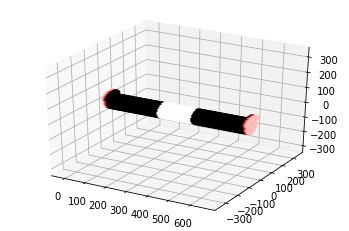

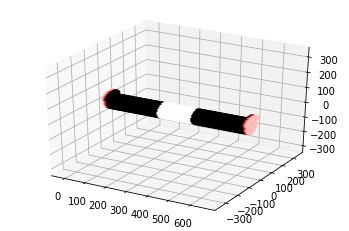

In [25]:
# Plot test
syst_pars = dict(a=8, angle=0, site_disorder=False, holes=True,
                 L=640, L_sc=8, phi=135, r1=50, r2=70, shape='circle',
                 with_leads=True, with_shell=True, with_vlead=True)

syst, hopping = funcs.make_3d_wire(**syst_pars)
gate_fun = funcs.gate(syst, 100, 160)
sites = [gate_fun(pos[0]) for pos in [i.pos for i in syst.sites]]
kwant.plot(syst, site_lw=0, site_color=sites, colorbar=False)

In [26]:
syst_pars = dict(a=8, angle=0, site_disorder=True, holes=True,
                 L=640, L_sc=8, phi=135, r1=50, r2=70, shape='circle',
                 with_leads=True, with_shell=True, with_vlead=True)

params = dict(alpha=20, B_y=0, B_z=0, Delta=60, g=50, mu=20, orbital=True,
              c_tunnel=5/8, salt=7, T=100e-3, **funcs.constants.__dict__)

Bs = np.linspace(0, 0.5, 51)
Vs = np.linspace(0, 10, 51)
gate_sizes = [160]
disorders = [0, 75]

vals = funcs.named_product(gate_size=gate_sizes,
                           disorder=disorders, V=Vs, B_x=Bs)

def func(val, syst_pars=syst_pars, params=params):
    import funcs
    syst, hopping = funcs.make_3d_wire(**syst_pars)

    # Combine the fixed parameters `params` and the changing
    # parameters `val` to one dict and evaluate the string
    # lambda functions.
    params = funcs.parse_params(dict(**params, **val))

    # Create a potential function for the gate.
    params['V'] = funcs.gate(syst, params['V'], params['gate_size'])

    # Return a combined dictionary with the results and input.
    return dict(**funcs.I_c(syst, hopping, params), **val)

fname = "tmp/I_c(B_x,_V)_gate160nm_mu20meV_disorder0,75meV_T0.1K_{}.hdf"
funcs.run_simulation(lview, func, vals, dict(**params, **syst_pars), fname, 2500)

NameError: name 'lview' is not defined

# 1D toymodel $I_c(\alpha, B_x)$
Supplementary materials figure 7

In [27]:
syst_pars = dict(a=10, L=500, L_sc=100)

params = dict(B_y=0, B_z=0, Delta=0.25, g=50, V='lambda x: 0', T=0.1,
              **funcs.constants.__dict__)

alphas = np.linspace(0, 30, 101)
B_xs = np.linspace(0, 1.4, 101)
mus = [0.1, 0.3, 1, 3, 10, 30]

vals = funcs.named_product(alpha=alphas, B_x=B_xs, mu=mus)

def func(val, syst_pars=syst_pars, params=params):
    import funcs
    syst, hopping = funcs.make_1d_wire(**syst_pars)

    # Combine the fixed parameters `params` and the changing
    # parameters `val` to one dict and evaluate the string
    # lambda functions.
    params = funcs.parse_params(dict(**params, **val))

    # Return a combined dictionary with the results and input.
    return dict(**funcs.I_c(syst, hopping, params), **val)

funcs.run_simulation(lview, func, vals, dict(**params, **syst_pars),
                     'tmp/1d_alpha_vs_B_x_{}.hdf', N=20000, overwrite=True)

NameError: name 'lview' is not defined